In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42) 
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)


[[0.93366893]
 [0.56456263]] [1.78134581]
[[0.93366893 0.56456263]] [1.78134581]
(100, 2) (100, 1)


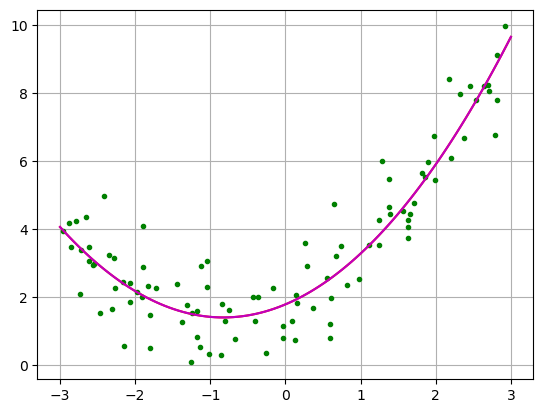

In [3]:
from regression import LinearRegression
from sklearn.linear_model import Ridge as SKRidge
from sklearn.linear_model import LinearRegression as SKLinearRegression 

class Ridge():
  def __init__(self, alpha) -> None:
    self.alpha = alpha

  def __add_bias(self, X):
    return np.c_[np.ones((X.T.shape[-1],1)), X]
  
  def fit(self, X, y):
    X_b = self.__add_bias(X)
    A = np.identity(X_b.shape[1])
    A[0, 0] = 0
    self.theta = np.linalg.inv(X_b.T @ X_b  + self.alpha * A) @ X_b.T @ y
    self.intercept_ = self.theta[0]
    self.coef_ = self.theta[1:]

    
  def predict(self, X):
    return self.__add_bias(X) @ self.theta

X_poly = np.c_[X, np.power(X, 2)]
X_test = np.linspace(-3, 3, m).reshape(m, 1)

X_poly_test = np.c_[X_test, np.power(X_test, 2)]

plt.plot(X, y, "g.", label="Predictions")

alpha = 0.0

lr = Ridge(alpha=alpha)
lr.fit(X_poly, y)
print(lr.coef_, lr.intercept_)

y_pred = lr.predict(X_poly_test)

plt.plot(X_test, y_pred, "r-")


lr2 = SKRidge(alpha=alpha, solver="cholesky")
lr2.fit(X_poly, y)
print(lr2.coef_, lr2.intercept_)

y_pred_reg = lr2.predict(X_poly_test)
print(X_poly.shape, y_pred.shape)
plt.plot(X_test, y_pred_reg, "m-")

# plt.scatter(X, y)
plt.grid(True)
plt.show()

[[2.46056519]
 [1.58841316]] [3.87595489]
[1.23900637 0.96538425] [3.63882546]
(100, 2) (100,)


c:\Users\Vadim\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


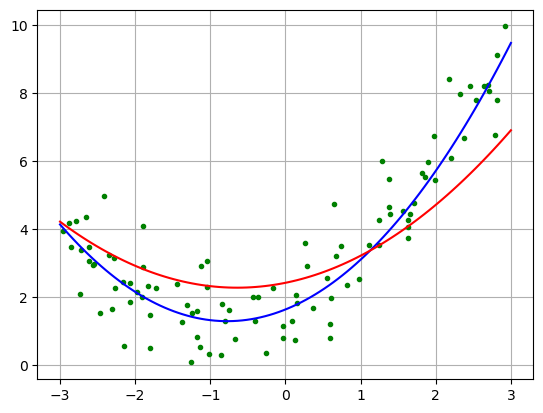

In [6]:
from sklearn.linear_model import SGDRegressor
from regression import SGDRegression
from utils import StandardScaler

    
X_poly = np.c_[X, np.power(X, 2)]
X_test = np.linspace(-3, 3, m).reshape(m, 1)

std_scaler = StandardScaler()

X_poly_scaled = std_scaler.fit_transform(X_poly)


X_poly_test = np.c_[X_test, np.power(X_test, 2)]
X_poly_test_scaled = std_scaler.fit_transform(X_poly_test)


plt.plot(X, y, "g.", label="Predictions")

sgd = SGDRegression(n_iter=100, eta0=5.1, seed=42, penalty="l1", lr0=5, lr1=50,alpha=0.5)
#lr = Ridge(alpha=0)
sgd.fit(X_poly_scaled, y)
print(sgd.coef_, sgd.intercept_)

y_pred = sgd.predict(X_poly_test_scaled)

plt.plot(X_test, y_pred, "b-")


lr2 =  SGDRegressor(max_iter=100, eta0=0.01, random_state=42, penalty="l1", l1_ratio=0.5, alpha=0.5, learning_rate="constant")
lr2.fit(X_poly_scaled, y)
print(lr2.coef_, lr2.intercept_)  

y_pred_reg = lr2.predict(X_poly_test_scaled)
print(X_poly_scaled.shape, y_pred_reg.shape)
plt.plot(X_test, y_pred_reg, "r-")


#plt.axis([-5, 5, -5, 10])

# plt.scatter(X, y)
plt.grid(True)
plt.show()